## Case Study Regression

### 1. Import packages

In [1]:
# list of imports and password security
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import warnings
import pymysql
import sqlalchemy
from sqlalchemy import inspect
from sqlalchemy import create_engine
import getpass
import os
import matplotlib.dates as mdates
import datetime as dt
import scipy.stats as stats
import math

### 1.1 Import data

In [2]:
pwd

'/Users/lucastrost/Documents/GitHub/Ironhack-MidBootProject/Python Notebook'

In [3]:
cd ..

/Users/lucastrost/Documents/GitHub/Ironhack-MidBootProject


In [4]:
cd datasets/

/Users/lucastrost/Documents/GitHub/Ironhack-MidBootProject/datasets


In [5]:
ls

regression_data.csv     regression_data.xls     regression_dataSQL.csv


In [6]:
df = pd.read_csv('regression_dataSQL.csv') # regression_dataSQL.csv is the bug free version

### 2. Basic cleaning and wrangling

### 2.1 data quality check

In [7]:
df

,Unnamed: 0,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### 2.1.1 Check for duplicates

In [9]:
# count duplicates 
df.duplicated().sum()

0

### 2.1.2 Check for nulls

In [10]:
# count nulls
df.isna().sum()

Unnamed: 0       0
id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

### 2.2 drop unecessary columns

In [11]:
# Unnamed: 0 seems to be some form of indexing
df = df.drop('Unnamed: 0', axis = 1)

### 3. EDA

### 3.1 Verifying data types

In [12]:
# All columns except date are numeric 

In [13]:
# Float values for bathrooms and floors raise question marks

In [14]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [15]:
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [16]:
# online research show both to be valid hence we keep them

### 3.1.1 Saving DataFrame backup pre EDA

In [17]:
# before doing any significant EDA steps, lets save our current df
df_preEDA = df

### 3.1.2 Dropping columns

In [18]:
# as our goal is to create a machine learning model date and id would lead to over-fitting, 
# which is why we should drop those columns
# lat and long are also unique, most likely leading to overfitting
df = df.drop(['id', 'date','lat','long'], axis = 1)

In [19]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


### 3.2 Understanding our Data

In [20]:
# prior to working in python the data has been worked with in Tableau and SQL 

### 3.2.1 Outliers

In [21]:
# generally price outliers should be kept regarding this case, 
# as we would heavily alter our data/results by removing all of our priciest properties 

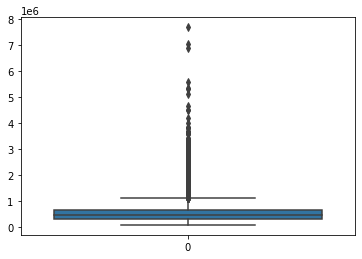

In [22]:
sns.boxplot(data = df['price']);

In [23]:
# due to our previous experience with the data we know there to be an outlier regarding bedrooms

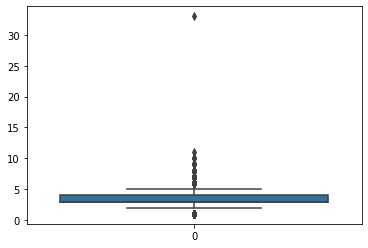

In [24]:
sns.boxplot(data = df['bedrooms']);

In [25]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [26]:
df.loc[df['bedrooms'] == 33]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
15856,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,1330,4700,640000


In [27]:
# the property with 33 bedrooms appears illogical and can be dropped, perhaps bad data or wrong entry. 
df = df[df['bedrooms']!=33]

In [28]:
df = df.reset_index(drop=True)

In [29]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

### 3.2.2 Correlations

In [30]:
# adjust size
sns.set(rc={'figure.figsize':(15,10)})

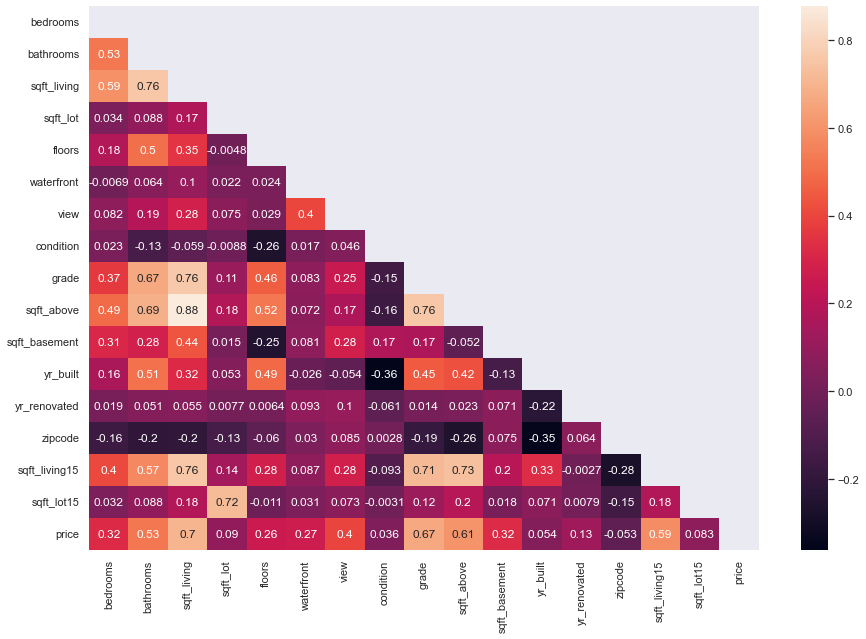

In [31]:
# correlation matrix(heatmap)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, mask = mask);

In [32]:
# The heatmap shows multiple highly correlated columns, e.g. sqft.living and bathrooms.

In [33]:
# Logically speaking those columns are certainly different, thus we will keep them for now

### 3.3 Scaling

In [34]:
df['price'].max()

7700000

In [35]:
df=(df-df.min())/(df.max()-df.min())

In [36]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,0.2,0.066667,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.000000,0.893939,0.161934,0.005742,0.018880
1,0.2,0.233333,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.443478,0.988089,0.626263,0.222165,0.008027,0.060352
2,0.1,0.066667,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.000000,0.136364,0.399415,0.008513,0.013382
3,0.3,0.333333,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.000000,0.681818,0.165376,0.004996,0.069011
4,0.2,0.200000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.756522,0.000000,0.368687,0.241094,0.007871,0.056678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,0.2,0.266667,0.088079,0.000370,0.8,0.0,0.0,0.5,0.5,0.128319,0.000000,0.947826,0.000000,0.515152,0.194631,0.000986,0.036998
21592,0.3,0.266667,0.147304,0.003206,0.4,0.0,0.0,0.5,0.5,0.214602,0.000000,0.991304,0.000000,0.732323,0.246257,0.007523,0.042246
21593,0.1,0.033333,0.049355,0.000503,0.4,0.0,0.0,0.5,0.4,0.071903,0.000000,0.947826,0.000000,0.722222,0.106866,0.001558,0.042522
21594,0.2,0.266667,0.093394,0.001132,0.4,0.0,0.0,0.5,0.5,0.136062,0.000000,0.904348,0.000000,0.131313,0.173980,0.000731,0.042246


### 4. Basic Machine Learning Model

In [37]:
# since we dropped the date column all columns are numeric

In [38]:
# for our basic model we will use Linear Regression

### 4.1 Set target label and features

In [39]:
# Set base and LinReg dataframes
base_df = df
df_LinReg = df

In [40]:
# set y
y_lr = df_LinReg['price']

# set X
X_lr = df_LinReg.drop('price', axis = 1)

### 4.2 Import model

In [41]:
from sklearn.linear_model import LinearRegression

### 4.3 Split into test and train data

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=40) # Test size = 30%

### 4.4 Run the model

In [44]:
linreg = LinearRegression().fit(X_lr, y_lr)
plr=linreg.fit(X_lr_train,y_lr_train)    

### 4.5 Evaluate model

In [45]:
y_lr_pred = plr.predict(X_lr_test)

In [46]:
# import tools
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [47]:
# R square 
r2(y_lr_test,y_lr_pred)

0.6645844358454452

In [48]:
# Mean Square Error(MSE)
mse(y_lr_test,y_lr_pred)

0.0007845718696635121

In [49]:
# Root Mean Square Error(MSE)
rmse = math.sqrt(mse(y_lr_test,y_lr_pred))
rmse

0.02801021009673994

In [50]:
# Mean Absolute Error(MAE)
mae(y_lr_test, y_lr_pred)

0.018400341596360965

### 5. Improving Linear Regression Model

In [51]:
# perhaps taking a look at the columns with high correlation will lead to improved results

### 5.1 Attempt: Correlations

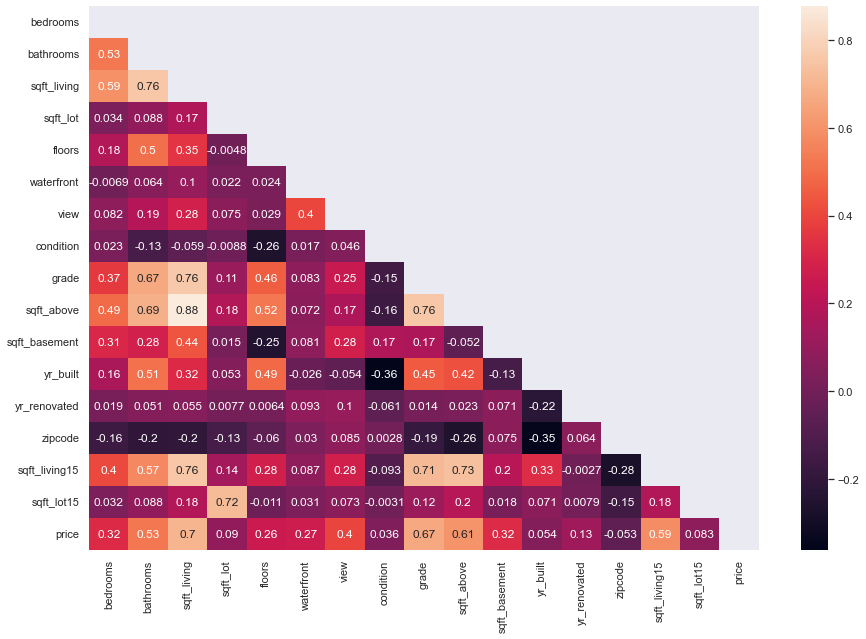

In [52]:
# correlation matrix(heatmap)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, mask = mask);

In [53]:
# overall columns regarding the size of the property show high correlation 

In [54]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'price'],
      dtype='object')

In [55]:
df[['bedrooms','bathrooms','sqft_living', 'sqft_lot','sqft_above', 'floors','sqft_basement','sqft_living15', 'sqft_lot15']]

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,floors,sqft_basement,sqft_living15,sqft_lot15
0,0.2,0.066667,0.061503,0.003108,0.089602,0.0,0.000000,0.161934,0.005742
1,0.2,0.233333,0.167046,0.004072,0.199115,0.4,0.082988,0.222165,0.008027
2,0.1,0.066667,0.030372,0.005743,0.044248,0.0,0.000000,0.399415,0.008513
3,0.3,0.333333,0.120729,0.002714,0.075221,0.0,0.188797,0.165376,0.004996
4,0.2,0.200000,0.099468,0.004579,0.144912,0.0,0.000000,0.241094,0.007871
...,...,...,...,...,...,...,...,...,...
21591,0.2,0.266667,0.088079,0.000370,0.128319,0.8,0.000000,0.194631,0.000986
21592,0.3,0.266667,0.147304,0.003206,0.214602,0.4,0.000000,0.246257,0.007523
21593,0.1,0.033333,0.049355,0.000503,0.071903,0.4,0.000000,0.106866,0.001558
21594,0.2,0.266667,0.093394,0.001132,0.136062,0.4,0.000000,0.173980,0.000731


In [56]:
# as we can see in the DataFrame we view sqft_living as sqft_above combined wit sqft_basement 
# (unorthodox as basement usually isn't included in sqft living)
# dropping them would mean we have no more way to check if a property has a basement or not
# additionally online research shows basement square footage to be worth less than above square footage

df = df.drop(['sqft_above','sqft_basement'], axis = 1)

In [57]:
df['sqft_living15'].value_counts()

0.196352    197
0.179143    195
0.199793    192
0.189468    180
0.182585    169
           ... 
0.574256      1
0.783170      1
0.400792      1
0.747031      1
0.435037      1
Name: sqft_living15, Length: 777, dtype: int64

In [58]:
df['sqft_lot15'].value_counts()

0.004996    427
0.003847    356
0.006144    288
0.007523    210
0.004766    145
           ... 
0.010934      1
0.011397      1
0.012436      1
0.000917      1
0.001558      1
Name: sqft_lot15, Length: 8682, dtype: int64

In [59]:
# We can now go one step further we can exclude sqft_living and sqft_lot as we more recent data.
# If a house has not been renovated values would've stayed the same

df = df.drop(['sqft_living','sqft_lot'], axis = 1)

In [60]:
df

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,0.2,0.066667,0.0,0.0,0.0,0.5,0.4,0.478261,0.000000,0.893939,0.161934,0.005742,0.018880
1,0.2,0.233333,0.4,0.0,0.0,0.5,0.4,0.443478,0.988089,0.626263,0.222165,0.008027,0.060352
2,0.1,0.066667,0.0,0.0,0.0,0.5,0.3,0.286957,0.000000,0.136364,0.399415,0.008513,0.013382
3,0.3,0.333333,0.0,0.0,0.0,1.0,0.4,0.565217,0.000000,0.681818,0.165376,0.004996,0.069011
4,0.2,0.200000,0.0,0.0,0.0,0.5,0.5,0.756522,0.000000,0.368687,0.241094,0.007871,0.056678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,0.2,0.266667,0.8,0.0,0.0,0.5,0.5,0.947826,0.000000,0.515152,0.194631,0.000986,0.036998
21592,0.3,0.266667,0.4,0.0,0.0,0.5,0.5,0.991304,0.000000,0.732323,0.246257,0.007523,0.042246
21593,0.1,0.033333,0.4,0.0,0.0,0.5,0.4,0.947826,0.000000,0.722222,0.106866,0.001558,0.042522
21594,0.2,0.266667,0.4,0.0,0.0,0.5,0.5,0.904348,0.000000,0.131313,0.173980,0.000731,0.042246


### 5.1.2 Test Attempt-Correlations

In [61]:
y_lr = df['price']
X_lr = df.drop('price', axis = 1)

X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=40) # Test size = 30%

linreg = LinearRegression().fit(X_lr_train, y_lr_train)
plri=linreg.fit(X_lr_train,y_lr_train)    

y_lr_pred = plri.predict(X_lr_test)

In [62]:
# r squared
r2(y_lr_test,y_lr_pred)

0.6337941125804456

In [63]:
# Mean Square Error(MSE)
mse(y_lr_test,y_lr_pred)

0.000856593636311268

In [64]:
# Root Mean Square Error(MSE)
rmse = math.sqrt(mse(y_lr_test,y_lr_pred))
rmse

0.029267620954072576

In [65]:
# Mean Absolute Error(MAE)
mae(y_lr_test, y_lr_pred)

0.01883425566171551

In [66]:
# -> model worse than before

### 5.1.3 Test Attempt-Correlations 

In [67]:
# this time we are not going to drop sqft_living and sqft_lot

In [68]:
df = base_df

In [69]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,0.2,0.066667,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.000000,0.893939,0.161934,0.005742,0.018880
1,0.2,0.233333,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.443478,0.988089,0.626263,0.222165,0.008027,0.060352
2,0.1,0.066667,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.000000,0.136364,0.399415,0.008513,0.013382
3,0.3,0.333333,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.000000,0.681818,0.165376,0.004996,0.069011
4,0.2,0.200000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.756522,0.000000,0.368687,0.241094,0.007871,0.056678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,0.2,0.266667,0.088079,0.000370,0.8,0.0,0.0,0.5,0.5,0.128319,0.000000,0.947826,0.000000,0.515152,0.194631,0.000986,0.036998
21592,0.3,0.266667,0.147304,0.003206,0.4,0.0,0.0,0.5,0.5,0.214602,0.000000,0.991304,0.000000,0.732323,0.246257,0.007523,0.042246
21593,0.1,0.033333,0.049355,0.000503,0.4,0.0,0.0,0.5,0.4,0.071903,0.000000,0.947826,0.000000,0.722222,0.106866,0.001558,0.042522
21594,0.2,0.266667,0.093394,0.001132,0.4,0.0,0.0,0.5,0.5,0.136062,0.000000,0.904348,0.000000,0.131313,0.173980,0.000731,0.042246


In [70]:
df = df.drop(['sqft_above','sqft_basement'], axis = 1)

In [71]:
y_lr = df['price']
X_lr = df.drop('price', axis = 1)

X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=40)

linreg = LinearRegression().fit(X_lr_train, y_lr_train)
plri=linreg.fit(X_lr_train,y_lr_train)    

y_lr_pred = plri.predict(X_lr_test)

In [72]:
# r squared
r2(y_lr_test,y_lr_pred)

0.6645291215490168

In [73]:
# Root Mean Square Error(MSE)
rmse = math.sqrt(mse(y_lr_test,y_lr_pred))
rmse

0.028012519621636287

In [74]:
# Mean Absolute Error(MAE)
mae(y_lr_test, y_lr_pred)

0.018408987148094226

In [75]:
# -> almost identical to base model

In [76]:
base_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,0.2,0.066667,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.000000,0.893939,0.161934,0.005742,0.018880
1,0.2,0.233333,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.443478,0.988089,0.626263,0.222165,0.008027,0.060352
2,0.1,0.066667,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.000000,0.136364,0.399415,0.008513,0.013382
3,0.3,0.333333,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.000000,0.681818,0.165376,0.004996,0.069011
4,0.2,0.200000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.756522,0.000000,0.368687,0.241094,0.007871,0.056678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,0.2,0.266667,0.088079,0.000370,0.8,0.0,0.0,0.5,0.5,0.128319,0.000000,0.947826,0.000000,0.515152,0.194631,0.000986,0.036998
21592,0.3,0.266667,0.147304,0.003206,0.4,0.0,0.0,0.5,0.5,0.214602,0.000000,0.991304,0.000000,0.732323,0.246257,0.007523,0.042246
21593,0.1,0.033333,0.049355,0.000503,0.4,0.0,0.0,0.5,0.4,0.071903,0.000000,0.947826,0.000000,0.722222,0.106866,0.001558,0.042522
21594,0.2,0.266667,0.093394,0.001132,0.4,0.0,0.0,0.5,0.5,0.136062,0.000000,0.904348,0.000000,0.131313,0.173980,0.000731,0.042246


### 6. Model 2: K Neighbours Regression

In [77]:
from sklearn.neighbors import KNeighborsRegressor
df = base_df  # resetting df

y_kn = df['price']
X_kn = df.drop('price', axis = 1)

X_kn_train, X_kn_test, y_kn_train, y_kn_test = train_test_split(X_kn, y_kn, test_size=0.3, random_state=40) 

pkn = KNeighborsRegressor(n_neighbors=7)
pkn.fit(X_kn_train, y_kn_train)

KNeighborsRegressor(n_neighbors=7)

In [78]:
y_kn_pred = pkn.predict(X_kn_test)

In [79]:
# r squared
r2(y_kn_test,y_kn_pred)

0.7146768132989367

In [80]:
# Root Mean Square Error(MSE)
rmse = math.sqrt(mse(y_kn_test,y_kn_pred))
rmse

0.025834097466285944

In [81]:
# Mean Absolute Error(MAE)
mae(y_kn_test, y_kn_pred)

0.015108498072176842

In [82]:
# -> large improvement to linear regression model | pretty stable regarding k

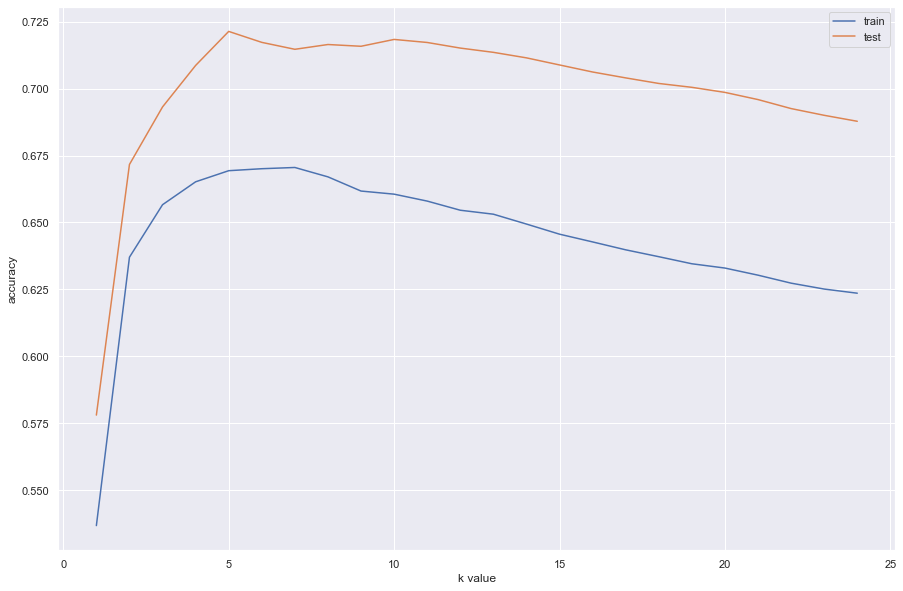

In [83]:
accuracy_train=[]
accuracy_test=[]
for k in range(1,25):
    pkn = KNeighborsRegressor(n_neighbors=k)
    pkn.fit(X_kn_test, y_kn_test)
    y_kn_pred1=pkn.predict(X_kn_train)
    accuracy_train.append(r2(y_kn_train,y_kn_pred1)) 
    pkn = KNeighborsRegressor(n_neighbors=k)
    pkn.fit(X_kn_train, y_kn_train)
    y_kn_pred2=pkn.predict(X_kn_test)
    accuracy_test.append(r2(y_kn_test,y_kn_pred2))
plt.plot(range(1,25),accuracy_train,label='train')
plt.plot(range(1,25),accuracy_test,label='test')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.legend();

### 6.1 Attempt: Grouping

In [84]:
base_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,0.2,0.066667,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.478261,0.000000,0.893939,0.161934,0.005742,0.018880
1,0.2,0.233333,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.443478,0.988089,0.626263,0.222165,0.008027,0.060352
2,0.1,0.066667,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.286957,0.000000,0.136364,0.399415,0.008513,0.013382
3,0.3,0.333333,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.565217,0.000000,0.681818,0.165376,0.004996,0.069011
4,0.2,0.200000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.756522,0.000000,0.368687,0.241094,0.007871,0.056678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,0.2,0.266667,0.088079,0.000370,0.8,0.0,0.0,0.5,0.5,0.128319,0.000000,0.947826,0.000000,0.515152,0.194631,0.000986,0.036998
21592,0.3,0.266667,0.147304,0.003206,0.4,0.0,0.0,0.5,0.5,0.214602,0.000000,0.991304,0.000000,0.732323,0.246257,0.007523,0.042246
21593,0.1,0.033333,0.049355,0.000503,0.4,0.0,0.0,0.5,0.4,0.071903,0.000000,0.947826,0.000000,0.722222,0.106866,0.001558,0.042522
21594,0.2,0.266667,0.093394,0.001132,0.4,0.0,0.0,0.5,0.5,0.136062,0.000000,0.904348,0.000000,0.131313,0.173980,0.000731,0.042246


In [85]:
# transform yr_renovated & yr_built into meaningful numerical categories
df = base_df
def groupyr_ren(year):
    if year >= 2010:
        return 2
    elif year >= 2000:
        return 1
    else:
        return 0
df['yr_renovated'] = pd.Series(list(map(groupyr_ren,df['yr_renovated'])))

In [86]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,0.2,0.066667,0.061503,0.003108,0.0,0.0,0.0,0.5,0.4,0.089602,0.000000,0.478261,0,0.893939,0.161934,0.005742,0.018880
1,0.2,0.233333,0.167046,0.004072,0.4,0.0,0.0,0.5,0.4,0.199115,0.082988,0.443478,0,0.626263,0.222165,0.008027,0.060352
2,0.1,0.066667,0.030372,0.005743,0.0,0.0,0.0,0.5,0.3,0.044248,0.000000,0.286957,0,0.136364,0.399415,0.008513,0.013382
3,0.3,0.333333,0.120729,0.002714,0.0,0.0,0.0,1.0,0.4,0.075221,0.188797,0.565217,0,0.681818,0.165376,0.004996,0.069011
4,0.2,0.200000,0.099468,0.004579,0.0,0.0,0.0,0.5,0.5,0.144912,0.000000,0.756522,0,0.368687,0.241094,0.007871,0.056678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,0.2,0.266667,0.088079,0.000370,0.8,0.0,0.0,0.5,0.5,0.128319,0.000000,0.947826,0,0.515152,0.194631,0.000986,0.036998
21592,0.3,0.266667,0.147304,0.003206,0.4,0.0,0.0,0.5,0.5,0.214602,0.000000,0.991304,0,0.732323,0.246257,0.007523,0.042246
21593,0.1,0.033333,0.049355,0.000503,0.4,0.0,0.0,0.5,0.4,0.071903,0.000000,0.947826,0,0.722222,0.106866,0.001558,0.042522
21594,0.2,0.266667,0.093394,0.001132,0.4,0.0,0.0,0.5,0.5,0.136062,0.000000,0.904348,0,0.131313,0.173980,0.000731,0.042246


In [87]:
# through testing, grouping yr_built has proven to be ineffective, but we will keep the code for now

In [88]:
# yr_built has a more complex impact on price due to demand not behaving linear (see link below)
# https://www.bankrate.com/real-estate/should-you-buy-an-old-or-new-home/#:~:text=Old%20house%20may%20mean%20old%20components&text=%E2%80%9CIf%20it's%20a%2050%2Dyear,rather%20irrelevant%2C%E2%80%9D%20Burkholder%20says.
#def groupyr_bui(year):
#    if year >= 2005:   
#        return 5
#    elif year >= 1990:    
#        return 4
#   elif year >= 1970:
#        return 3
#    elif year >= 1950:
#        return 2
#    elif year >= 1920:
#        return 1
#    else: 
#        return 0
#df['yr_built'] = pd.Series(list(map(groupyr_bui,df['yr_built'])))

### 6.1.2 Test Attempt-Grouping

In [89]:
y_kn = df['price']
X_kn = df.drop('price', axis = 1)

X_kn_train, X_kn_test, y_kn_train, y_kn_test = train_test_split(X_kn, y_kn, test_size=0.3, random_state=40) 

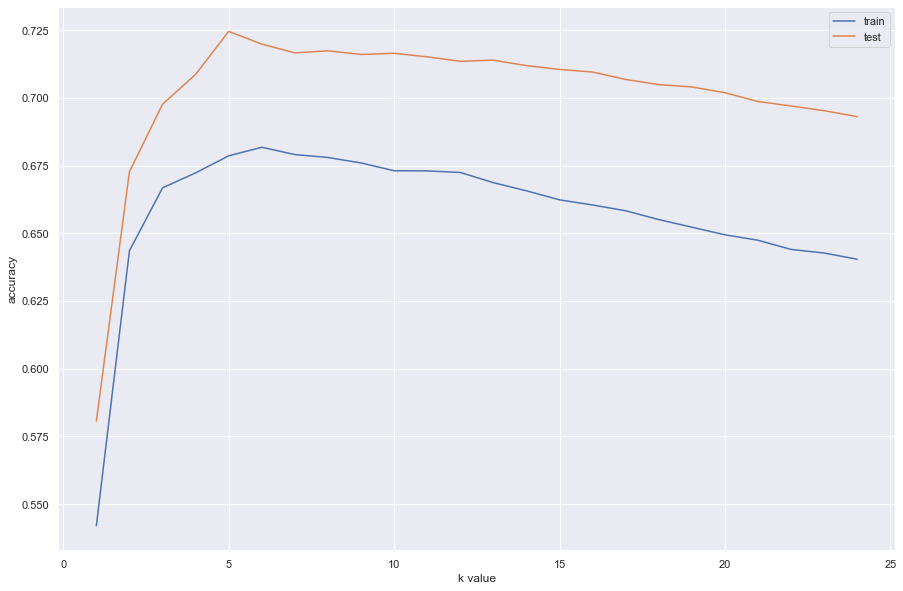

In [90]:
accuracy_train=[]
accuracy_test=[]
for k in range(1,25):
    pkn = KNeighborsRegressor(n_neighbors=k)
    pkn.fit(X_kn_test, y_kn_test)
    y_kn_pred1=pkn.predict(X_kn_train)
    accuracy_train.append(r2(y_kn_train,y_kn_pred1)) 
    pkn = KNeighborsRegressor(n_neighbors=k)
    pkn.fit(X_kn_train, y_kn_train)
    y_kn_pred2=pkn.predict(X_kn_test)
    accuracy_test.append(r2(y_kn_test,y_kn_pred2))
plt.plot(range(1,25),accuracy_train,label='train')
plt.plot(range(1,25),accuracy_test,label='test')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.legend();

In [91]:
pkn = KNeighborsRegressor(n_neighbors=7)
pkn.fit(X_kn_train, y_kn_train)

y_kn_pred = pkn.predict(X_kn_test)

In [92]:
# Root Mean Square Error(RMSE)
rmse = math.sqrt(mse(y_kn_test,y_kn_pred))
rmse

0.025744816720591056

In [93]:
# compared to the previous RMSE of 0.025834097466285944, our module has gotten slightly less accurate
# however, the model gained significant stability in regards to which k we use (useful implications for our case)

### 6.2 Test Attempt-Correlations

In [94]:
# we are going to continue using the grouped df

In [95]:
# dropping highly correlated columns (for detail look at 5.3 Test Attempt-Correlations)
df = df.drop(['sqft_above','sqft_basement'], axis = 1)

In [96]:
y_kn = df['price']
X_kn = df.drop('price', axis = 1)

X_kn_train, X_kn_test, y_kn_train, y_kn_test = train_test_split(X_kn, y_kn, test_size=0.3, random_state=40) 

In [97]:
pkn = KNeighborsRegressor(n_neighbors=7)
pkn.fit(X_kn_train, y_kn_train)

y_kn_pred = pkn.predict(X_kn_test)

In [98]:
# Root Mean Square Error(RMSE)
rmse = math.sqrt(mse(y_kn_test,y_kn_pred))
rmse

0.02547660697786023

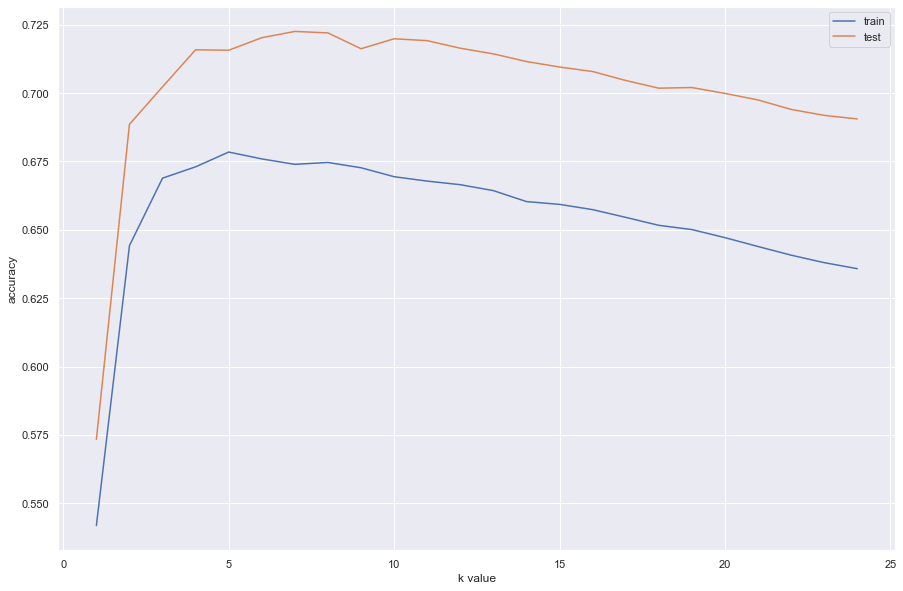

In [99]:
accuracy_train=[]
accuracy_test=[]
for k in range(1,25):
    pkn = KNeighborsRegressor(n_neighbors=k)
    pkn.fit(X_kn_test, y_kn_test)
    y_kn_pred1=pkn.predict(X_kn_train)
    accuracy_train.append(r2(y_kn_train,y_kn_pred1)) 
    pkn = KNeighborsRegressor(n_neighbors=k)
    pkn.fit(X_kn_train, y_kn_train)
    y_kn_pred2=pkn.predict(X_kn_test)
    accuracy_test.append(r2(y_kn_test,y_kn_pred2))
plt.plot(range(1,25),accuracy_train,label='train')
plt.plot(range(1,25),accuracy_test,label='test')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.legend();

## Note to self: use decision tree to assess 2nd part of the problem